In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

We can see that we have the different number of arrivals per second so we can get the inter arrival times by taking 1/number arrivals in that time period but that assumes constant arrival time and is based more on second than anything

In [24]:
# to begin lets look at a completely liquid market
# there is an underlying price of P0 = 100
P0 = 100
n_sims = 10
arrival_rate = 1
average_wait_time = 1 / arrival_rate
inter_arrival_times = np.random.exponential(average_wait_time, n_sims)

# each one of the arrival will have a price
# let the price be a uniform distribution from P0 - 5% of current price to P0 + 5% of current price
prices_range = P0 * 0.05
lowest_price = P0 - prices_range
highest_price = P0 + prices_range
arrival_prices = np.random.uniform(lowest_price, highest_price, n_sims)
arrival_prices

array([ 95.20584494, 104.69909852, 103.32442641,  97.12339111,
        96.81824967,  96.8340451 ,  98.04242243, 100.24756432,
        99.31945019,  97.9122914 ])

In [25]:
# get the tuple of inter-arrival times and prices
zipped_arrivals = list(zip(inter_arrival_times, arrival_prices))
input_variables = pd.DataFrame(zipped_arrivals, columns=['Inter-Arrival Time', 'Arrival Price'])
input_variables

,Inter-Arrival Time,Arrival Price
0,0.469268,95.205845
1,3.010121,104.699099
2,1.316746,103.324426
3,0.912943,97.123391
4,0.169625,96.818250
5,0.169596,96.834045
6,0.059839,98.042422
7,2.011231,100.247564
8,0.919082,99.319450
9,1.231250,97.912291


Text(0, 0.5, 'Price')

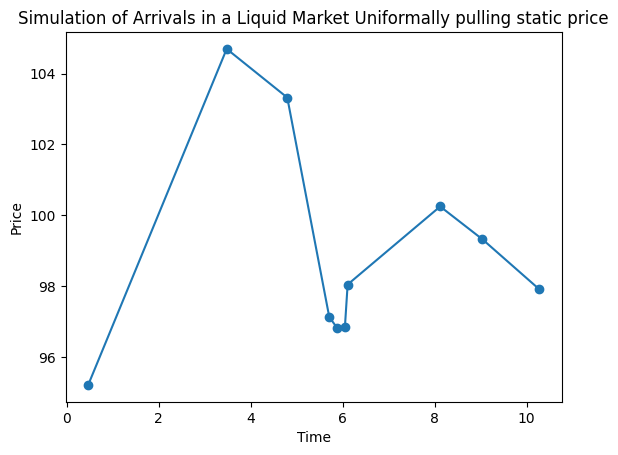

In [26]:
start_times = np.cumsum(input_variables['Inter-Arrival Time'])
plt.plot(start_times, arrival_prices, marker='o')
plt.title('Simulation of Arrivals in a Liquid Market Uniformally pulling static price')
plt.xlabel('Time')
plt.ylabel('Price')

In [27]:
# i want to build it so that the price updates 
# that means that we have to pull a new price based on the last price so a new distribution is created at each time step
np.random.poisson(0.02)

0

(array([2.420e+03, 1.867e+03, 1.402e+03, 1.052e+03, 7.950e+02, 5.660e+02,
        4.620e+02, 3.470e+02, 2.560e+02, 1.880e+02, 1.730e+02, 1.150e+02,
        1.020e+02, 6.200e+01, 4.400e+01, 4.100e+01, 2.500e+01, 2.100e+01,
        1.100e+01, 1.300e+01, 1.100e+01, 8.000e+00, 5.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([1.16348231e-06, 2.72426100e-02, 5.44840566e-02, 8.17255031e-02,
        1.08966950e-01, 1.36208396e-01, 1.63449843e-01, 1.90691289e-01,
        2.17932736e-01, 2.45174182e-01, 2.72415629e-01, 2.99657075e-01,
        3.26898522e-01, 3.54139969e-01, 3.81381415e-01, 4.08622862e-01,
        4.35864308e-01, 4.63105755e-01, 4.90347201e-01, 5.17588648e-01,
        5.44830094e-01, 5.72071541e-01, 5.99312987e-01, 6.26554434e-01,
        6.53795881e-01, 6.81037327e-01, 7.08278774e-01, 7.35520220e-01,
        7.62761667e-01, 7.90003113e-01, 8.17244560e-01]),
 <BarContainer object of 30 artists>)

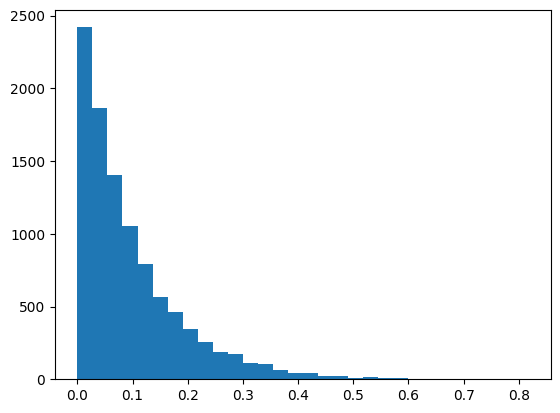

In [28]:
# let interarrival rates be determined at the start
# never use poisson process for interarrival rate
# if we assume 10 people to arrive in one unit time of a second then we have exponential interarrival times with mean of 0.1 seconds
plt.hist(np.random.exponential(0.1, 10000),bins=30)

Here we can observe the exponential distribution where almost all of the rates around 0 to 0.1

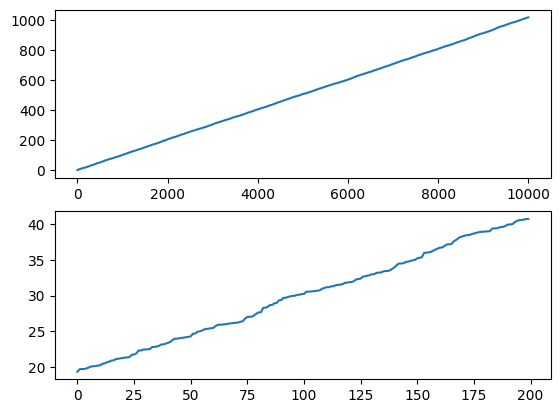

In [29]:
# now for each one of these interarrival times we need to pull a price based on the last price
P0 = 100
last_price = P0

# arrival times 
arrival_times = np.cumsum(np.random.exponential(0.1, 10000))

plt.subplot(2,1,1)
plt.plot(arrival_times)
plt.subplot(2,1,2)
plt.plot(arrival_times[200:400])

We can see that over time the IID look to be completely straight showing that the long term run can be found but will be different on shorter time scales.

Text(0, 0.5, 'Price')

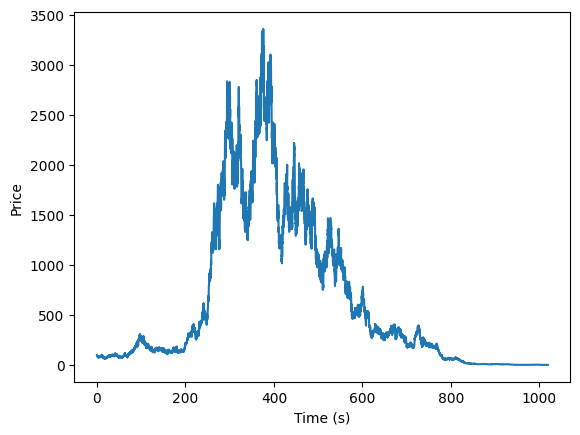

In [30]:
# now we can just concentrate completely on prices actually 
# we want to run multiple simulations of the same process
prices = []
for i,time in enumerate(arrival_times):
    if i == 0:
        price = P0
    else:
        price_range = last_price * 0.05
        lowest_price = last_price - price_range
        highest_price = last_price + price_range
        price = np.random.uniform(lowest_price, highest_price)
    prices.append(price)
    last_price = price

plt.plot(arrival_times, prices)
plt.xlabel('Time (s)')
plt.ylabel('Price')

When we pull randomly from a uniform that means that a consumer would be as likely to pull above as below a price which is incorrect. 

We have it so that the price only takes on the last price however we want it to be that we build up the prices in a storage system. Like a queue

In [31]:
# we want to update the above process where we store individuals in a queue whose orders have not been filled
# we need to now add in a supply component to not have infinite liquidity
# we want it to be that anyone who arrives to the queue has a 0.5 probability of being a buyer or a seller
# we now move into OO programming as we need to keep track of the order book and the individuals in the queue

# why dont we start with just creating a priority queue
# we will keep price stagnent and pull form the distribution variate to get arrival times and volume of trade



(array([42., 19., 13., 12.,  2.,  3.,  2.,  1.,  4.,  2.]),
 array([0.04910376, 0.89644596, 1.74378816, 2.59113035, 3.43847255,
        4.28581475, 5.13315695, 5.98049914, 6.82784134, 7.67518354,
        8.52252573]),
 <BarContainer object of 10 artists>)

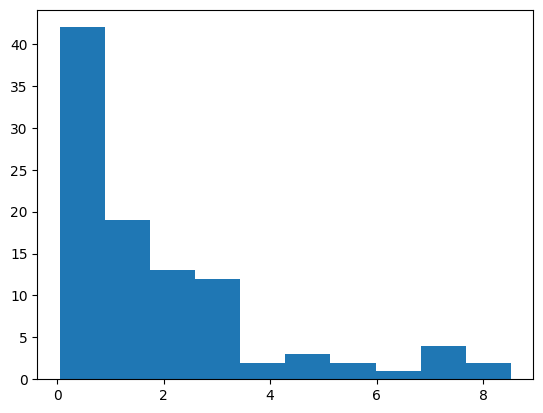

In [32]:
plt.hist(np.random.exponential(2,100))

We can see a standard exponential 

Let us continue with our price example of $100

The best bid can be 98 and the best ask can be 102

A conservative person would maybe have 1% of the time go above the best bid, 5% at the best bid and increasingly increase the distribution

(array([2.000e+00, 5.000e+00, 1.600e+01, 2.900e+01, 9.400e+01, 1.790e+02,
        4.530e+02, 1.065e+03, 2.469e+03, 5.688e+03]),
 array([81.06916775, 82.76224987, 84.45533199, 86.1484141 , 87.84149622,
        89.53457834, 91.22766046, 92.92074257, 94.61382469, 96.30690681,
        97.99998893]),
 <BarContainer object of 10 artists>)

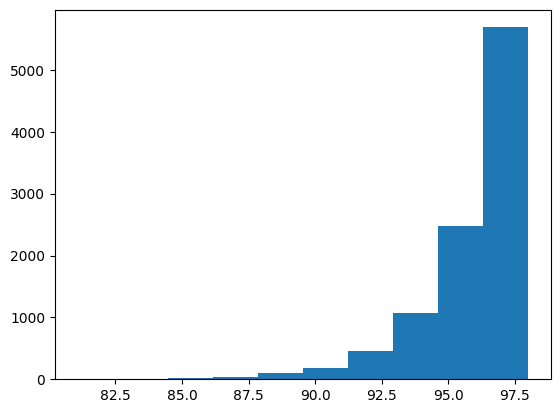

In [33]:
best_bid = 98
exponential_variate = np.random.exponential(2,10000)
exponential_dist = 98 - exponential_variate
plt.hist(exponential_dist)

You see that this is the opposite of what we want, we want a smaller value at the best bid/ask not what we currently have, we need to do acceptance rejection sampling using a proposed distribution.

(array([89.,  3.,  2.,  1.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([4.97870684e-02, 6.56599696e+06, 1.31319939e+07, 1.96979908e+07,
        2.62639877e+07, 3.28299846e+07, 3.93959815e+07, 4.59619784e+07,
        5.25279753e+07, 5.90939722e+07, 6.56599691e+07]),
 <BarContainer object of 10 artists>)

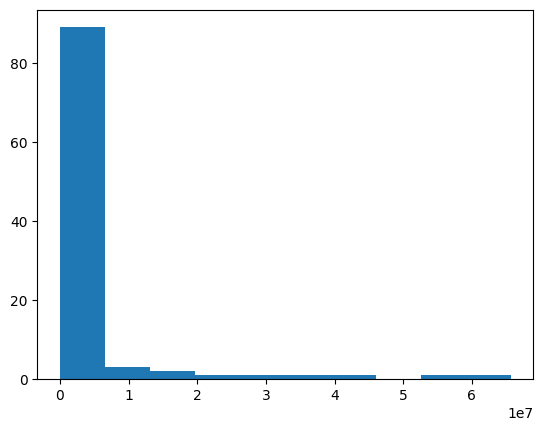

In [34]:
# lets get the function
# lets get the domain
midpoint = 100
best_bid = 99
best_ask = 101

# percentile difference
pct_diff_bid_ask_conservative = 0.2

buyer_min = midpoint - 0.2*midpoint
buyer_max = best_ask
x_buyer = np.linspace(buyer_min,buyer_max,100)
y_buyer = []

seller_min = best_bid
seller_max = midpoint + 0.2 * midpoint
x_seller = np.linspace(seller_min,seller_max,100)
y_seller = []

for x in x_buyer:
    x_buyer_value = np.exp(-(x-98)) # use the buyer distribution
    y_buyer.append(x_buyer_value)

plt.hist(y_buyer)

In [35]:
# how about we just start with the random investor
# we can use the simple transform IID U

In [36]:
# lets create two list of people 
# each of them has a uniform between 1 and 100
# we then want them to interact and to determine how many of them share a number
# you know what would be interesting if you had this play out on a grid where people can take a random walk 
# then we could ask how long would it take for every match to be found

n = 100
list_1 = np.random.randint(1,100,20)
list_2 = np.random.randint(1,100,20)

# we now want to see the numbee of matches between the two lists
# brute force method
common_numbers = []
for i,i_value in enumerate(list_1):
    for j,j_value in enumerate(list_2):
        if i_value == j_value:
            common_numbers.append((i,i_value))

common_numbers

[(18, np.int64(78))]

In [37]:
# the thing is that matching values does not neccessarily have to be the same
# if we use uniform without random integer we need to create bins

# it is considered a match if it is + or - either side of the value 

list_1 = np.random.uniform(1,10,20).round(2)
list_2 = np.random.uniform(1,10,20).round(2)

common_numbers = []

for i,i_value in enumerate(list_1):
     # create a new list of values it could be from (2 decimal places from -0.1% to +0.1%)
    i_value_range_min = i_value - 1
    i_value_range_max = i_value + 1
    i_value_range = np.linspace(i_value_range_min,i_value_range_max,10)

    for i_dt in i_value_range:

        for j,j_value in enumerate(list_2):
            if i_value == j_value:
                j_value_range_min = j_value - 1
                j_value_range_max = j_value + 1
                j_value_range = np.linspace(j_value_range_min,j_value_range_max,10)

                for j_dt in j_value_range:

                    if i_dt == j_dt:
                        common_numbers.append((i,i_value))

common_numbers

[]

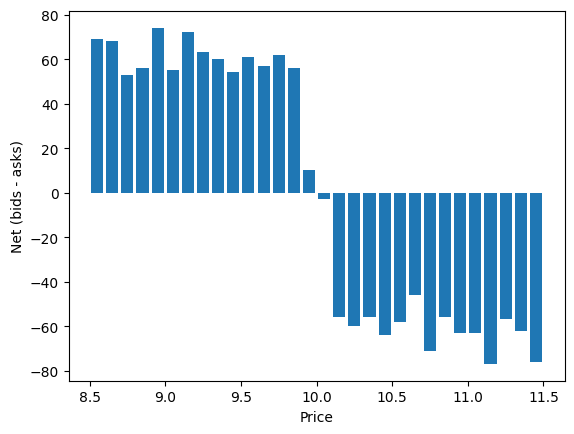

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p0 = 10
best_bid = 9.5
best_ask = 10.5

# uniformly spaced around min & max without overlapping the spread
bid_list = np.sort(np.random.uniform(best_bid - 1, p0+0.1, 1000).round(2))
ask_list = np.sort(np.random.uniform(p0-0.1, best_ask + 1, 1000).round(2))

# construct a consistent global bin grid
bin_edges = np.arange(min(bid_list.min(), ask_list.min()),
                      max(bid_list.max(), ask_list.max()) + 0.1,
                      0.1)

bid_bins = pd.cut(bid_list, bins=bin_edges)
ask_bins = pd.cut(ask_list, bins=bin_edges)

bin_freq_bid = bid_bins.value_counts().sort_index()
bin_freq_ask = ask_bins.value_counts().sort_index()

# align bins and compute diff
diff = bin_freq_bid.reindex(bin_freq_bid.index, fill_value=0) - \
       bin_freq_ask.reindex(bin_freq_bid.index, fill_value=0)

# plot at bin centers
bin_centers = np.array([interval.mid for interval in diff.index])

plt.bar(bin_centers, diff.values, width=0.08)
plt.xlabel("Price")
plt.ylabel("Net (bids - asks)")
plt.show()

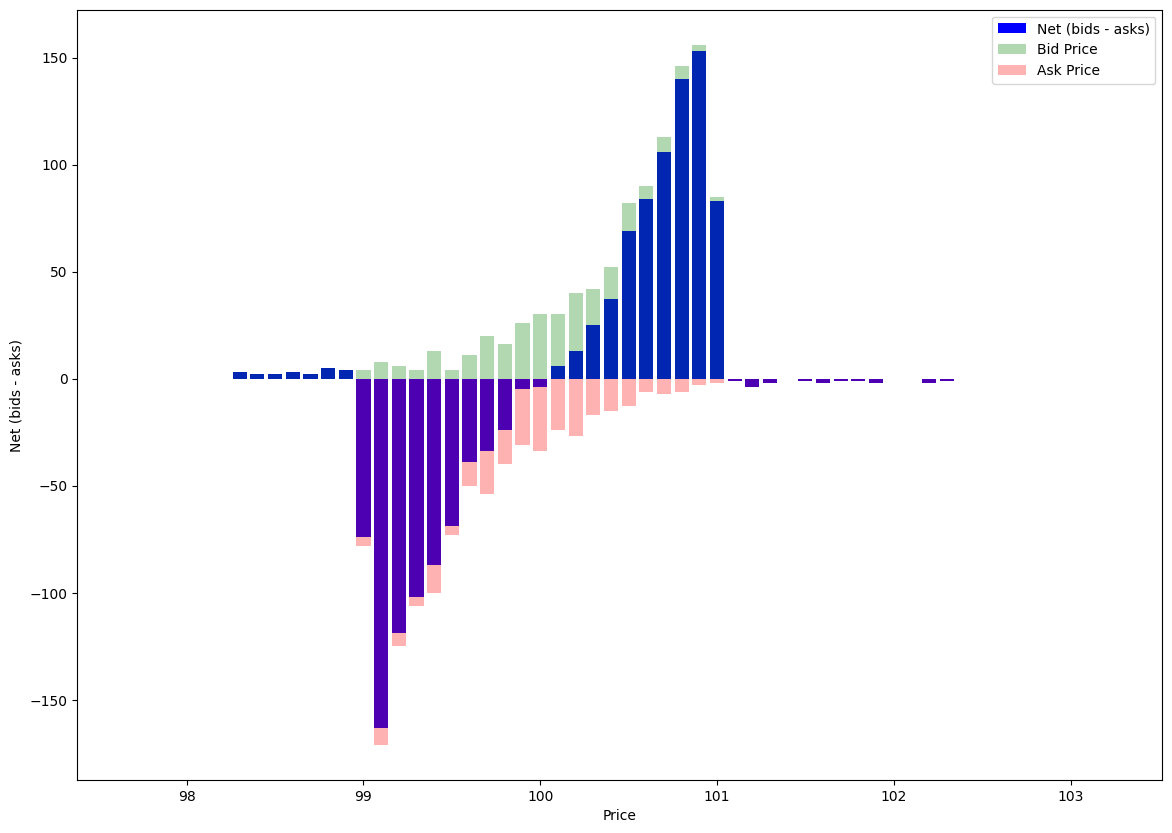

In [39]:
p0 = 100
best_bid = 99
best_ask = 101

# uniformly spaced around min & max without overlapping the spread
bid_list = np.sort(best_bid + 2 -  np.random.exponential(0.5, 1000).round(2))
ask_list = np.sort(best_ask - 2 + np.random.exponential(0.5, 1000).round(2))

# construct a consistent global bin grid
bin_edges = np.arange(min(bid_list.min(), ask_list.min()),
                      max(bid_list.max(), ask_list.max()) + 0.1,
                      0.1)

bid_bins = pd.cut(bid_list, bins=bin_edges)
ask_bins = pd.cut(ask_list, bins=bin_edges)

bin_freq_bid = bid_bins.value_counts().sort_index()
bin_freq_ask = ask_bins.value_counts().sort_index()

# align bins and compute diff
diff = bin_freq_bid.reindex(bin_freq_bid.index, fill_value=0) - \
       bin_freq_ask.reindex(bin_freq_bid.index, fill_value=0)

# plot at bin centers
bin_centers = np.array([interval.mid for interval in diff.index])

plt.figure(figsize=(14,10))
plt.bar(bin_centers, diff.values, width=0.08,label='Net (bids - asks)',color='Blue')
plt.bar(bin_freq_bid.index.categories.mid, bin_freq_bid.values, width=0.08, alpha=0.3, color='green',label='Bid Price')
plt.bar(bin_freq_ask.index.categories.mid, -bin_freq_ask.values, width=0.08, alpha=0.3, color='red',label='Ask Price')
plt.xlabel("Price")
plt.ylabel("Net (bids - asks)")
plt.legend()
plt.show()

now it makes sense the reason the book looks like this is because there arent people meeting to trade.

Here we have the beginnings of the bid and the ask
We now need overlap

here we have the arrival rates

In [80]:
def inverse_transform_method_exponential(u, arrival_rate):
    return - (1 / arrival_rate) * np.log(u)

def interarrival_stochastic_process(num_participants, arrival_rate, random_seed):
    np.random.seed(random_seed)

    # independent uniforms for buyers & sellers
    buyer_u  = np.random.rand(num_participants)
    seller_u = np.random.rand(num_participants)

    # exponential interarrival times
    buyer_inter = inverse_transform_method_exponential(buyer_u, arrival_rate)
    seller_inter = inverse_transform_method_exponential(seller_u, arrival_rate)

    # cumulative arrival times
    buyer_times = np.cumsum(buyer_inter)
    seller_times = np.cumsum(seller_inter)

    buyers = pd.DataFrame({"time": buyer_times, "type": 1})
    sellers = pd.DataFrame({"time": seller_times, "type": -1})

    events = pd.concat([buyers, sellers], ignore_index=True)
    events = events.sort_values("time").reset_index(drop=True)

    # last arrival times (still valid)
    last_buyer_time  = buyers["time"].max()
    last_seller_time = sellers["time"].max()
    T_end = min(last_buyer_time, last_seller_time)

    # compute stop_index AFTER sorting/resetting
    stop_index = events.index[events["time"] <= T_end].max()

    # set index to time
    events = events.set_index("time")

    imbalance_series = events["type"].cumsum().iloc[:stop_index]

    return imbalance_series

def simulate_interarrival_stochastic_process(num_participants, arrival_rate, n_sim):
    results = []
    for i in range(n_sim):
        r = interarrival_stochastic_process(num_participants, arrival_rate, i)
        results.append(r)
    return results

We allow the interaction to take place until we run out of one of the interarrival times

In [58]:
results = simulate_interarrival_stochastic_process(10000,2,1000)

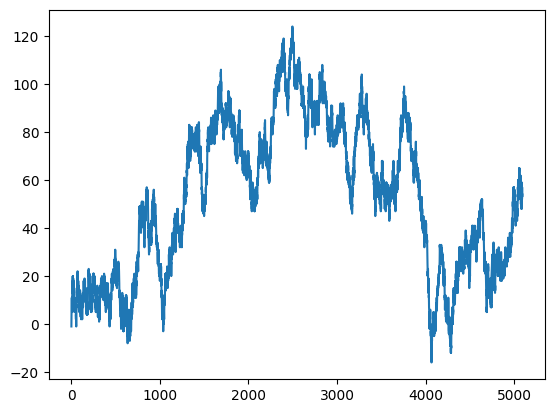

In [62]:
plt.plot(results[0])

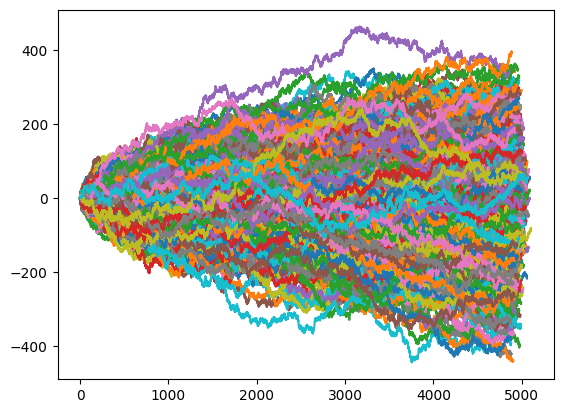

In [59]:
for i in range(len(results)):
    plt.plot(results[i])

We can see that when there is an equal number of buyers and sellers then the price will always return, we need to make the number of buyers/sellers a random variable as well

At this point we need to put into a queue dependent on time 


What we have so far:

Instead of having just +1 or -1 for buyer/seller we now need it to be that prices are pulled 

We need to have it so that

In [312]:
def price_bin_counts(bid_prices, ask_prices, bin_width=0.1):
    """
    Creates aligned histogram bins for bids and asks.
    Returns:
        bin_centers, bid_freq, ask_freq, net_diff
    """

    # global bin edges spanning all prices
    p_min = min(bid_prices.min(), ask_prices.min())
    p_max = max(bid_prices.max(), ask_prices.max())

    bin_edges = np.arange(p_min, p_max + bin_width, bin_width)

    # assign to bins
    bid_bins = pd.cut(bid_prices, bins=bin_edges)
    ask_bins = pd.cut(ask_prices, bins=bin_edges)

    # frequency counts aligned by index
    bid_freq = bid_bins.value_counts().sort_index()
    ask_freq = ask_bins.value_counts().sort_index()

    # ensure same indexing
    ask_freq = ask_freq.reindex(bid_freq.index, fill_value=0)

    # net order-book imbalance per bin
    net_diff = bid_freq - ask_freq

    # bin centers for plotting
    bin_centers = np.array([interval.mid for interval in bid_freq.index])

    return bin_centers, bid_freq.values, ask_freq.values, net_diff.values, bid_bins,ask_bins


In [326]:
def interarrival_stochastic_process_price(num_participants, arrival_rate, random_seed, price_scaling,p0):
    np.random.seed(random_seed)

    # independent uniforms for buyers & sellers
    buyer_u  = np.random.rand(num_participants)
    seller_u = np.random.rand(num_participants)

    # exponential interarrival times
    buyer_inter = inverse_transform_method_exponential(buyer_u, arrival_rate)
    seller_inter = inverse_transform_method_exponential(seller_u, arrival_rate)

    # cumulative arrival times
    buyer_times = np.cumsum(buyer_inter)
    seller_times = np.cumsum(seller_inter)

    # prices to pull from
    buyer_prices = p0 - 2 + inverse_transform_method_exponential(buyer_u,price_scaling)
    seller_prices = p0 + 2 - inverse_transform_method_exponential(seller_u,price_scaling)

    # create dataframes for the different buy and sell prices
    buyers = pd.DataFrame({"time": buyer_times, "price": buyer_prices})
    sellers = pd.DataFrame({"time": seller_times, "price": -seller_prices})

    events = pd.concat([buyers, sellers], ignore_index=True)
    events = events.sort_values("time").reset_index(drop=True)

    # last arrival times (still valid)
    last_buyer_time  = buyers["time"].max()
    last_seller_time = sellers["time"].max()
    T_end = min(last_buyer_time, last_seller_time)

    # compute stop_index AFTER sorting/resetting
    stop_index = events.index[events["time"] <= T_end].max()

    # set index to time
    events = events.set_index("time")

    # stop index slicing
    events = events.iloc[:stop_index]

    # return both events + binned book shape
    return buyers,sellers,buyer_prices,seller_prices, events


We need to have time and then instead of regular prices have our prices as binned associated prices

<BarContainer object of 51 artists>

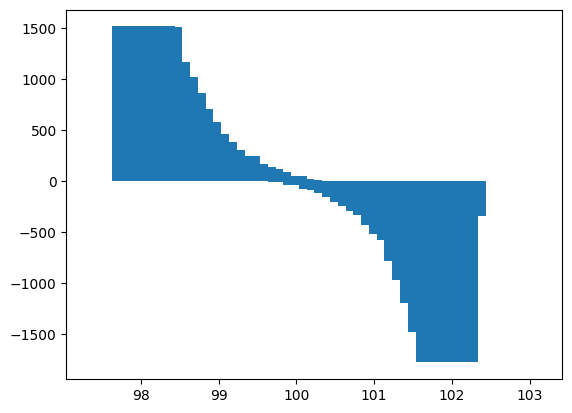

In [327]:
returns = interarrival_stochastic_process_price(10000,10,2,2,100)

binned_returns = price_bin_counts(returns[2],returns[3],0.1)
plt.bar(binned_returns[0], binned_returns[3])

In [333]:
#returns[2]['binned_returns'] = 
bid_bins = binned_returns[4][:len(returns[0])]
ask_bins = binned_returns[5][:len(returns[1])]

returns[1]['categorical_price'] = binned_returns[5]
returns[0]['categorical_price'] = binned_returns[4]

returns[1]

,time,price,categorical_price
0,0.309645,-100.451774,"(100.383, 100.483]"
1,0.444032,-101.328066,"(101.283, 101.383]"
2,0.459498,-101.922669,"(101.883, 101.983]"
3,0.476173,-101.916625,"(101.883, 101.983]"
4,0.603576,-101.362983,"(101.283, 101.383]"
...,...,...,...
9995,984.784564,-101.088318,"(101.083, 101.183]"
9996,984.972526,-101.060190,"(100.983, 101.083]"
9997,985.453271,-99.596278,"(99.583, 99.683]"
9998,985.467098,-101.930863,"(101.883, 101.983]"


In [335]:
binned_events = pd.concat([returns[0], returns[1]], ignore_index=True)
binned_events = binned_events.sort_values("time").reset_index(drop=True)
binned_events

,time,price,categorical_price
0,0.083012,98.415062,"(98.383, 98.483]"
1,0.309645,-100.451774,"(100.383, 100.483]"
2,0.444032,-101.328066,"(101.283, 101.383]"
3,0.448262,99.826250,"(99.783, 99.883]"
4,0.459498,-101.922669,"(101.883, 101.983]"
...,...,...,...
19995,1020.874289,98.133820,"(98.083, 98.183]"
19996,1021.025831,98.757710,"(98.683, 98.783]"
19997,1021.056732,98.154503,"(98.083, 98.183]"
19998,1021.082459,98.128633,"(98.083, 98.183]"


Now I have the categorical price so that can be used as the level that we bin to

10000

In [ ]:
# lets return the events list but with categorical values 


This is the output at the end of the 

[   0    0    0 1468 1457 1118  984  835  679  554  457  375  302  241
  243  171  135  118   96   73   65   50   39   28   31   17   18   20
   14   15   13    6    4    7    7    3    0    2    1    2    1    0
    0    0    0    0    0    0    1    0    1]
[   0    0    0    3    0    0    0    2    1    3    4    2    5    4
    5    9    7    8   12   27   17   28   29   41   43   56   48   93
  104  128  171  209  246  301  336  428  515  575  782  972 1192 1476
 1774  342    0    0    0    0    0    0    0]
[    0     0     0  1465  1457  1118   984   833   678   551   453   373
   297   237   238   162   128   110    84    46    48    22    10   -13
   -12   -39   -30   -73   -90  -113  -158  -203  -242  -294  -329  -425
  -515  -573  -781  -970 -1191 -1476 -1774  -342     0     0     0     0
     1     0     1]


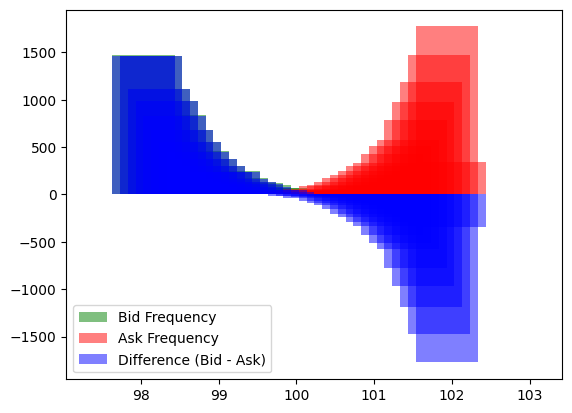

In [245]:
# i need the returns to go into their associated bins
returns = interarrival_stochastic_process_price(10000,10,2,2,100)[0]

results = price_bin_counts(
    np.abs(events.loc[events['price']>0,'price']).values,
    np.abs(events.loc[events['price']<0,'price']).values,
    bin_width=0.1
)

plt.bar(results[0],results[1],alpha=0.5,label='Bid Frequency',color='green')
print(results[1])
plt.bar(results[0],results[2],alpha=0.5,label='Ask Frequency',color='red')
print(results[2])
plt.bar(results[0],results[3],alpha=0.5,label='Difference (Bid - Ask)',color='blue')
print(results[3])
plt.legend()

In [ ]:
# number of trades 

In [217]:
returns = interarrival_stochastic_process_price(5,10,2,2,100)
returns[0]['price']

# for each time step we put our price into the associated bin and keep track of it in two separate queues
# if there is a buy and a sell present in both queues then execute trade 

time
0.083012    100.415062
0.110765    -99.446176
0.269411    -99.206770
0.317332    -99.760394
0.437845    -99.397438
0.448262    101.826250
0.508108    100.299225
Name: price, dtype: float64

Here we have the preloaded data let us now have this work per time.
We essentially want it so that each time a value is added to the queue it sorts.

In [208]:
# lets first try to do this arrays using sorted lists
# we need to use t
sell = []
buy = []
for i,row in returns[0].iterrows():
    if row['price'] < 0:
        print(f'sell order at {row[0]}')
        sell.append(row)
    else:
        buy.append(row)
        print(f'buy order at price {row[0]}')

buy order at price 100.41506236401815
sell order at -99.44617573510655
sell order at -99.20676962465413
sell order at -99.76039382323282
sell order at -99.39743772245606
buy order at price 101.82625000546842
buy order at price 100.29922543285817
sell order at -99.33942313017732
buy order at price 100.41583419497034
buy order at price 100.4333126158336


/var/folders/mc/w44dg5095cd1035wq8jxnqy80000gn/T/ipykernel_75580/274445436.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'buy order at price {row[0]}')
/var/folders/mc/w44dg5095cd1035wq8jxnqy80000gn/T/ipykernel_75580/274445436.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'sell order at {row[0]}')


We can see the progression if there is a negative this is a sell price

## 1st Experiment
In this case we are going to assume that investors have a belief about a price and it does not change with time.

So we have investor types with certain interarrival rates

Let us start with simply a buyer and a seller 

You have a belief about a stock

We can assume something like the investors assume mean variance optimization 

In [130]:
# create a distribution class that helps with numpy distributions
class Distribution:
    def __init__(self,sampler):
        self.sampler = sampler # function that returns a sample

    def sample(self):
        return self.sampler()


The distribution class essentially creates an object that you can pull samples from

In [96]:
class Investor: # this is the macro class that people take from (inheritence)
    def __init__(self, id, belief, arrival_distribution: Distribution, price_distribution: Distribution): # we use the distributions
        self.id = id
        self.belief = belief
        self.arrival_distribution = arrival_distribution
        self.price_distribution = price_distribution

    def generate_next_arrival(self,current_time):
        return current_time + self.arrival_distribution.sample() # where current time will pull from event clock
    
    def generate_price(self):
        noise = self.price_distribution.sample()
        return round(self.map_price(noise),2)
    
    def map_price(self,noise):
        raise NotImplementedError

class Buyer(Investor):
    def map_price(self,noise):
        return self.belief - noise
    
class Seller(Investor):
    def map_price(self,noise):
        return self.belief + noise

In [98]:
class Order:
    def __init__(self, investor_id, price, side, time):
        self.investor_id = investor_id
        self.price = price
        self.side = side  # 'buy' or 'sell'
        self.time = time


In [99]:
import heapq

class OrderBook:
    def __init__(self):
        self.bids = []  # max-heap
        self.asks = []  # min-heap

    def add_order(self, order: Order):
        if order.side == "buy":
            # use negative price for max-heap
            heapq.heappush(self.bids, (-order.price, order))
        else:
            heapq.heappush(self.asks, (order.price, order))

    def best_bid(self):
        return -self.bids[0][0] if self.bids else None

    def best_ask(self):
        return self.asks[0][0] if self.asks else None


In [100]:
class Simulator:
    def __init__(self, buyers, sellers, orderbook):
        self.buyers = buyers
        self.sellers = sellers
        self.orderbook = orderbook
        self.time = 0

    def run(self, T):
        while self.time < T:
            # determine next event
            next_entities = self.buyers + self.sellers
            next_investor = min(next_entities, key=lambda x: x.next_arrival_time)

            self.time = next_investor.next_arrival_time

            # generate an order
            price = next_investor.generate_price()
            side = 'buy' if isinstance(next_investor, Buyer) else 'sell'
            order = Order(next_investor.id, price, side, self.time)

            # place into orderbook
            self.orderbook.add_order(order)

            # schedule next arrival
            next_investor.next_arrival_time = next_investor.generate_next_arrival(self.time)


In [129]:
arrival_distribution = Distribution(lambda: np.random.exponential(1/10))
price_distribution = Distribution(lambda: np.random.exponential(2))

buyer = Buyer(1,100,arrival_distribution,price_distribution)
seller = Seller(1,100,arrival_distribution,price_distribution)

buyers = []
for i in range(10):
    buyers.append(Buyer(i,100,arrival_distribution,price_distribution))

99.09

In [86]:
# create a function for deciding a price given a belief
# lets just assume the best bid price is the belief
def price_given_belief_func(belief,exponential_param): # we want to round to 2 decimal places
    u = np.random.rand()
    x = inverse_transform_method_exponential(u, exponential_param)
    
    bid_price = round((belief + 2 - x),2)
    return bid_price
price_given_belief_func(100,0.5)

np.float64(100.37)

Ok so the above we can create buyers which 

In [87]:
class Buyer:
    def __init__(self,id,valuation_distribution,arrival_rate_distribution):
        self.id = id # we need to keep track of who is in the queue so that they can be removed
        # this is a maybe we could jsut have indistinguishable buyers/sellers

        # beliefs
        self.valuation = valuation_distribution.sample()
        
        # timining
        self.arrival_rate = arrival_rate_distribution
        self.next_arrival_time = self.generate_next_arrival(0)

    def generate_next_arrival(self,current_time):
        interarrival = np.random.exponential(1/self.arrival_rate)
        return current_time + interarrival

In [64]:
class Buyer:
    def __init__(self, id, valuation_distribution, arrival_rate):
        self.id = id

        # belief / valuation (sample from user-provided distribution)
        self.valuation = valuation_distribution.sample()

        # arrival process (lambda)
        self.arrival_rate = arrival_rate   # arrival_rate is λ, not the distribution object
        self.next_arrival_time = self.generate_next_arrival(0.0)

    def generate_next_arrival(self, current_time):
        """Generate an exponential interarrival time with rate λ."""
        interarrival = np.random.exponential(1 / self.arrival_rate)
        return current_time + interarrival

    def price_given_belief(self, exponential_param):
        """
        Price proposed by this buyer, given their valuation (belief).
        Uses exponential offset to determine willingness-to-pay.
        """
        u = np.random.rand()
        x = inverse_transform_method_exponential(u, exponential_param)

        raw_price = self.valuation + 2 - x
        bid_price = round(raw_price, 2)
        return bid_price


__main__.Buyer

In [ ]:
def interarrival_stochastic_process(num_participants, arrival_rate, random_seed):
    np.random.seed(random_seed)

    # independent uniforms for buyers & sellers
    buyer_u  = np.random.rand(num_participants)
    seller_u = np.random.rand(num_participants)

    # exponential interarrival times
    buyer_inter = inverse_transform_method(buyer_u, arrival_rate)
    seller_inter = inverse_transform_method(seller_u, arrival_rate)

    # cumulative arrival times
    buyer_times = np.cumsum(buyer_inter)
    seller_times = np.cumsum(seller_inter)

    buyers = pd.DataFrame({"time": buyer_times, "type": 1})
    sellers = pd.DataFrame({"time": seller_times, "type": -1})

    events = pd.concat([buyers, sellers], ignore_index=True)
    events = events.sort_values("time").reset_index(drop=True)

    # last arrival times (still valid)
    last_buyer_time  = buyers["time"].max()
    last_seller_time = sellers["time"].max()
    T_end = min(last_buyer_time, last_seller_time)

    # compute stop_index AFTER sorting/resetting
    stop_index = events.index[events["time"] <= T_end].max()

    # set index to time
    events = events.set_index("time")

    imbalance_series = events["type"].cumsum().iloc[:stop_index]

    return imbalance_series